In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import random

# Example 1

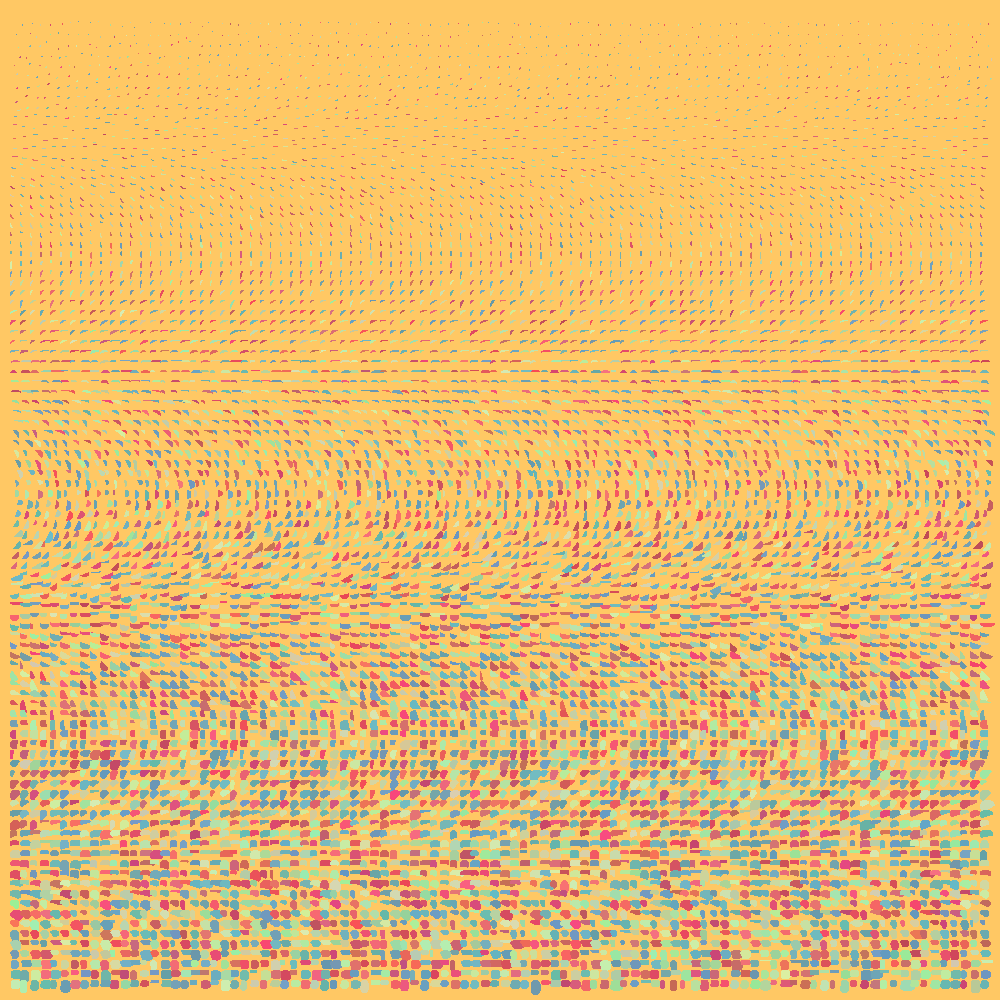

In [39]:
width = 1000
height = 1000
canvas = Image.new(size=(width,height), mode='RGB', color=(255,200,100))
draw = ImageDraw.Draw(canvas)

x_offset, y_offset = 10,10
x_sequence = np.arange(start=x_offset, stop = width-x_offset, step=10)
y_sequence = np.arange(start=y_offset, stop = height-y_offset, step=10)

distrib = [np.random.normal(loc=50, scale = 8, size=len(x_sequence)) for y in y_sequence]

coordinates = [[[x,y,
                 x+np.random.normal(10,2),
                 y+np.random.normal(8,2)] for x in x_sequence] for y in y_sequence]



for i,y in enumerate(coordinates):

    for x in y:
        colorA = (np.random.randint(100,120), np.random.randint(150,190), np.random.randint(165,200))
        colorB = (np.random.randint(190,250), np.random.randint(70,120), np.random.randint(85,130))
        colorC = (np.random.randint(150,220), np.random.randint(200,240), np.random.randint(150,180))
        colors = [colorA,colorB,colorC]
        
        draw.chord(x,start=i*6,end=i*9, fill=random.choice(colors))
canvas        

#canvas.save('wawawiwa.jpeg', 'JPEG')

# Example 3

In [3]:
color_ranges_blues = [(80,100), (130,150), (150,180)] 
color_ranges_yellows = [(240,255), (240,255), (100,120)]
color_ranges_greens = [(180,200), (220,255), (200,220)]
    
palettes = [color_ranges_blues, color_ranges_yellows, color_ranges_greens]

results = []
means = []
for x in palettes:
    print(x[0][0])
        

80
240
180


In [4]:
def create_range(max_diff):
     
    minimum = np.random.randint(50,200)
    maximum = np.random.randint(80,240)

    if (maximum - minimum) <= max_diff:
        return (minimum, maximum)
    else:
        return create_range(max_diff)

def create_sorted_array_image(width,height):
    channels = []
    color_range = [(100,200), (50,120), (50,80)]
    
    for color in range(3):
        mean = np.random.exponential(90)+np.random.normal(100)
        sd = np.random.normal(50)
        color_grid = np.random.normal(mean,sd, width*height).round()
        color_grid= np.reshape(color_grid, [width,height])
        color_grid = np.sort(color_grid, axis=1)
        color_grid = np.sort(color_grid, axis=0)

        color_grid = np.clip(color_grid,color_range[color][0], color_range[color][1])
        color_grid = np.asarray(color_grid,dtype=np.uint8)
        
        image = Image.fromarray(color_grid, 'L')
        #print('Channel grid size:', image.size)
        channels.append(image)

    rgb = Image.merge("RGB",tuple(channels))
    #rgb = rgb.rotate(90)
    return rgb

def create_pastes(n_horizontal,n_vertical, width, height):
    
    new_image = Image.new('RGB', (rgb_width*n_horizontal, rgb_heigth*n_vertical))
    #print('New Image size before:', new_image.size)
    
    image_list = [create_sorted_array_image(width=width, height=height) for i in range(n_horizontal*n_vertical+1)]
    
    x_offset = 0
    y_offset = 0
    
    for i,im in enumerate(image_list):
        new_image.paste(im, (x_offset,y_offset))
        x_offset += im.size[0]

        if i in np.arange(start = n_horizontal, stop = n_horizontal*n_vertical, step = n_horizontal):
            print(i)
            y_offset += im.size[1]
            x_offset = 0
            
    #print('New image size after pastes:',new_image.size)
            
    return new_image

rgb_width = 80
rgb_heigth = 140

n_horizontal = 10
n_vertical = 5
#new_image = Image.new('RGB', (rgb_width*n_horizontal, rgb_heigth*n_vertical))

10
20
30
40


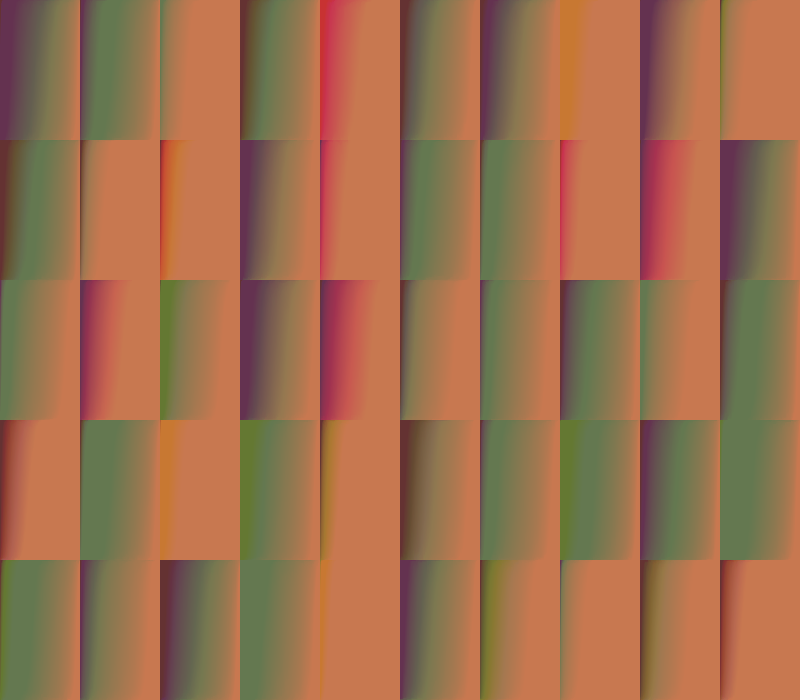

In [5]:
create_pastes(n_horizontal=n_horizontal, n_vertical=n_vertical, width=rgb_heigth, height=rgb_width)

In [6]:
!ls

dots.ipynb         gif_test.gif       sort_examples      triangle_sub.ipynb


In [7]:
import os

directory = './sort_examples'

images_list = []

for file in os.listdir(directory):
    if file.endswith('.jpeg'):
        print(file)
        im = Image.open(os.path.join(directory,file))
        images_list.append(im)

print(len(images_list))

#images_list[0].save('gif_test.gif',save_all=True, append_images=images_list[1:], optimize=False, duration=200, loop=0)

sortpixels_example6.jpeg
sortpixels_example13.jpeg
sortpixels_example12.jpeg
sortpixels_example7.jpeg
sortpixels_example19.jpeg
sortpixels_example0.jpeg
sortpixels_example15.jpeg
sortpixels_example14.jpeg
sortpixels_example1.jpeg
sortpixels_example18.jpeg
sortpixels_example17.jpeg
sortpixels_example2.jpeg
sortpixels_example3.jpeg
sortpixels_example16.jpeg
sortpixels_example11.jpeg
sortpixels_example4.jpeg
sortpixels_example15 copy.jpeg
sortpixels_example8.jpeg
sortpixels_example9.jpeg
sortpixels_example5.jpeg
sortpixels_example10.jpeg
21
